In [2]:
!pip install nxviz


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


# 1 The art of Seeing Networks

## 1.1 Introduction

**Complex network analysis (CNA)** is a rapidly expanding discipline that studies
how to **recognize**, **describe**, **analyze**, and **visualize** complex networks. The
Python library [NetworkX](https://networkx.github.io/) provides a collection of functions for **constructing**,
**measuring**, and **drawing** complex networks. We’ll see in next lessons how CNA
and NetworkX work together to automate mundane and tedious CNA tasks and
make it possible to study complex networks of varying sizes and at varying
levels of detail.


At this point, you may be wondering what a network is, why some networks
are complex, why it is important to recognize, describe, analyze, and visualize
them, and why the discipline is expanding right now instead of having
expanded, say, a hundred years ago. 


Complex networks, like mathematics, physics, and biology, have been in existence
for at least as long as we humans have. **Biological complex networks**, in
fact, predate humankind. However, intensive studies of complex networks did
not start until the late **1800s to early 1900s**, mostly because of the **lack of
proper mathematical apparatus** (graph theory, in the first place) and **adequate
computational tools**. The reason for the explosion of CNA research and applications
in the late **1900s–early 2000s** is two-fold. On the **“supply” side**, it is the
availability of **cheap and powerful computers** and the **abundance of researchers**
with advanced training in mathematics, physics, and social sciences. On the
**“demand” side**, it is the ever **increasing complexity of social, behavioral, biological,
financial, and technological** (to name a few) aspects of humanity.
In this first lesson, you will see different types and kinds of networks (including
complex networks) and learn why networks are important and why it is worth seeing them around.

## 1.2 Know your networks

In general, a **network** is yet another—relational—form of organization and
**representation of discrete data**. (The other one being tabular, with the data
organized in rows and columns.) Two important network concepts are **entities**
and the **relationships** between them. Depending on a researcher’s background,
**entities are known as nodes** (the term we’ll use in our lessons), actors, or vertices.
**Relationships are known as edges** (preferred in our lessons), links, arcs,
or connections. We will casually refer to **networks as “graphs”** (in the graph theoretical
meaning of the word), even though graphs are not the only way
to describe networks.

<img width="200" src="https://drive.google.com/uc?export=view&id=15GtKcQ3KvTCMMOFlIr020ybaWQydDNqA">

Network **nodes** and **edges** are high-level abstractions. For many types of network
analysis, their true nature is not essential. What matters
is the discreteness of the entities and the binarity of the relationships. A discrete
entity must be separable from all other entities—otherwise, it is not
clear how to represent it as a node. A relationship typically involves two discrete
entities; in other words, any two entities either are in a relationship or
not. (An entity can be in a relationship with itself. Such a relationship is called
reflexive.) It is not directly possible to use networks to model relationships
that involve more than two entities, but if such modeling is really necessary,
then you can use **hypergraphs**, which are beyond the scope of our lessons.

Once all of the above conditions are met, you can graphically represent and
visualize a node as a point or circle and an edge as a line or arc segment. You
can further **express node and edge attributes** by adding line thickness, color,
different shapes and sizes, and the like.


Let’s have a look at some really basic—so-called **“classic”—networks**.


- In a **checkerboard**, each field is an entity (node) with **three attributes: “color”
(“black” or white”), “column” (“A” through “H”), and “row” (1 through 8)**.
“Being next to” is the relationship between two entities. There is an edge
connecting two nodes if the nodes “are next to” each other. As a matter
of fact, “being next to” is one of the foundational relationships that leads
to **spatial networks**. You can see a “checkerboard” network, also known
as a **mesh or grid**, in the following figure.

<img width="500" src="https://drive.google.com/uc?export=view&id=1nGQomVMbYEJwGSIrh3g6c6CEPS4PyGRY">

- **In a timeline of our life**, each life event (such as “birth,” “high school graduation,” “marriage,” and eventually “death”) is an entity with at least one attribute: “time.” “Happening immediately after” is the relationship: an edge connects
two events if one event occurs immediately after the other, leading to a
network of events. Unlike “being next to,” “happening immediately after”
is not symmetric: if A happened immediately after B (there is an edge from
A to B), then B did not happen after A (there is no reverse edge).

- **In a family tree**, each person in the tree is an entity, and the relationship could
be either being “a descendant of” or “an ancestor of” (asymmetric). A
family tree network is neither spatial nor strictly temporal: the nodes are
not intrinsically arranged in space or time.

- **In a hierarchical system** that consists of parts, sub-parts, and sub-sub-parts , a part at any level of the hierarchy is an entity. The relationship between the entities is “a part of”: a paragraph is “a part of”
a subsection, which is “a part of” a section, which is “a part of” a chapter,
which is “a part of” a book.


**All the networks listed previously are simple because they have a regular or almost regular structure**.
- A checkerboard is a rectangular grid. 
- A timeline is a linear network. 
- A family tree is a tree, and such is a network of a hierarchical
system (a special case of a tree with just one level of branches is called a star). 

The following figure shows more simple networks: a linear timeline of Abraham Lincoln (A.L.), his family tree, and a ring of months in a year. (A ring is another
simple network, which is essentially a linear network, wrapped around.)

<img width="500" src="https://drive.google.com/uc?export=view&id=1BGMLVcsFQR1yr7bmp2iPc99WHUlIZjp-">


**Make no mistake:** 

> a simple network is simple not because it is small, but
because it is regular. 

For example, any ring node always has two neighbors;
any tree node (except for the root) has exactly one antecedent; any inner grid
node has exactly four neighbors, two of which are in the same row and the
other two in the same column. The complete world timeline has billions of
events. The humankind “family tree” has billions of individuals. We still consider
these networks simple.


What is a complex network, then?

**A complex network has a non-trivial structure.** It is not a grid, not a tree, not a
ring—but it is not entirely random, either. Complex networks emerge in nature
and the man-made world as a result of decentralized processes with no global
control. One of the most common mechanisms is the preferential attachment by [A-L Barabási and R Albert, Emergence of Scaling in Random Networks](http://science.sciencemag.org/content/286/5439/509), whereby **nodes with more
edges get even more edges**, forming gigantic hubs in the core, surrounded by
the poorly connected periphery. Another evolutionary mechanism is transitive
closure, which connects two nodes together if they are already connected to a
common neighbor, leading to densely interconnected network neighborhoods.

Let’s glance at some complex networks. The following table shows the major
classes of complex networks and some representatives from each class.

| Major classes of complex networks        | Representatives                  |
|--------------------------------|-----------------------------------------------------------------------------------------------------|
| Technological networks         | Communication systems; transportation; the Internet; electric grid; water mains                     |
| Biological/ecological networks | Food webs; gene/protein interactions; neural system; disease epidemics                              |
| Economic networks              | Financial transactions; corporate partnerships; international trade; market basket analysis         |
| Social networks                | Families and friends; email/SMS exchanges; professional groups                                      |
| Cultural networks              | Language families; semantic networks; literature, art, history, religion networks (emerging fields) |

## 1.3 Enter Complex Network Analysis

**Complex network analysis (CNA)**, which is the study of complex networks—
their structure, properties, and dynamics—is a relatively new discipline, but
with a rich history. You can think of CNA as a generalization of social network analysis (SNA) to
include non-social networks.

**Social networks** — descriptors of social structures through interactions—have
been known as “social groups” since the late 1890s. Their **systematic exploration
began in the 1930s**. In 1934, [J.L. Moreno (Who Shall Survive?](https://archive.org/details/whoshallsurviven00jlmo) developed **sociograms**—graph drawings of social networks. Eventually,
sociograms became the de facto standard of complex network visualization.

John Barnes coined the term “SNA” in 1954 [Class and Committees in a
Norwegian Island Parish](https://journals.sagepub.com/doi/10.1177/001872675400700102). Around the same time, **rapid penetration of mathematical methods into social sciences** began, leading to the emergence
of **SNA** as one of the **leading paradigms** in **contemporary sociology**.

Social network analysis addresses social networks at three levels: **microscopic**,
**mesoscopic**, and **macroscopic**. 

- **Microscopic level**:  we view a network as an assembly of individual nodes, dyads (pairs of connected nodes; essentially, edges), triads (triples of nodes, connected in a triangular way), and subsets
(tightly knit groups of nodes).
- **Mesoscopic level**:  focuses on exponential random graph models (ERGMs), scale-free and small-world networks, and network evolution.
- **Macroscopic level**:  concentrating on the properties of very large real-world graphs, such as
degree distribution, assortativity, and hierarchical structure.



# 2 Introducing NetworkX

## 2.1 Introduction

Any network starts with one node, and we can add more nodes and edges to
it, as needed. The attributes of those nodes and edges describe their properties.
The **node**, **edge**, and **attribute** data come from other data structures or files.
In this section, you will learn [NetworkX](https://networkx.github.io/) functions for
- starting a new network
- populating it with nodes and edges
- and decorating them with attributes. 

You will also learn how to create a “quick and dirty” visualization of the constructed
network. In many cases, **complex network analysis is an iterative process**, whereby the
network grows, shrinks, or undergoes other transformations over time. You
will learn how to preserve a complex network as a disk file in a variety of
popular formats and how to read data from appropriate files into the
NetworkX representation. We will use the following terminology throughout the book to refer to the **relationships between nodes and edges**:
- A node is incident to an edge if it is the start or end of the edge. The edge,
respectively, is incident to its end nodes.
- Two nodes are adjacent if they are incident to the same edge.
- Two edges are adjacent if they are incident to the same node.

## 2.2 Construct a Simple Network with NetworkX

A NetworkX project begins with importing module *networkx* (usually under the
name nx).

In [3]:
import networkx as nx

In [4]:
nx.__version__

'3.1'

### 2.2.1 Create a graph

A NetworkX network is a collection of edges and labeled nodes. The library
allows you to use any **hashable Python data as a node label** (different labels
within the same graph may belong to different data types). To create a new
network graph, you must choose an appropriate **graph type** and call the
respective constructor; pass either no parameters (for an empty graph) or a
list of edges as node pairs (lists or tuples). NetworkX supports four graph types: **undirected**, **directed**, **multigraphs** and **directed multigraphs**.

<img width="600" src="https://drive.google.com/uc?export=view&id=1bDRfZG2hL4ZWOYP-KbgjAGnsM2y-kJF8">

- **Undirected graphs** consist only of undirected edges - edges that can be
traversed in either direction so that an edge from A to B is the same as
an edge from B to A. Mathematically, undirected graphs represent **symmetric
relationships**: if A is in a relationship with B, then B is also in a
relationship with A. For example, sistership and companionship are
symmetric relationships, but “being in love with” is not (at least, not
always). Create an empty undirected graph with the constructor:

```python
nx.Graph()
```

> **Undirected graphs** can have self-loops—edges that start and end at the same node. Mathematically, self-loops represent a reflexive relationship: A is in a relationship with itself. If an undirected graph does not have self-loops, it is called a **simple graph**. A graph that is not simple is called a **pseudograph**.

- **Directed graphs**, also known as **digraphs**, have at least one directed edge. “Being the father of” is a **asymmetric relationship** and would be represented by a directed edge. You would use a directed graph for a family network that shows fathership and mothership. Create an empty directed graph with the constructor:

```python
G = nx.DiGraph()
```

> Many NetworkX algorithms refuse to calculate with digraphs. You can convert
a digraph into an undirected graph. All directed edges become undirected,
and all pairs of two reciprocal edges become single edges. However,
remember that the original digraph and the derived undirected graph are
different.

```python
F = nx.Graph(G) # F is undirected
```

- **Multigraphs** are like undirected graphs, but they can have parallel edges — multiple edges between the same nodes. Parallel edges may represent different types of relationships between the nodes. Create an empty multigraph with the constructor:

```python
nx.MultiGraph()
```

- Finally, **directed multigraphs** are what they say they are: directed graphs
with parallel edges. Create an empty directed multigraph with the constructor:

```python
nx.MultiDiGraph()
```

### 2.2.2 Add and Remove Nodes and Edges



NetworkX provides several mechanisms for adding nodes and edges to an
existing graph: one by one, from a list or another graph. Likewise, you can
remove nodes or edges one by one or by using a list. Node and edge manipulations
are subject to the following rules:
- Adding an edge to a graph also ensures that its ends are added if they
did not exist before.
- Adding a duplicate node or edge is silently ignored unless the graph is a
multigraph; in the latter case, an additional parallel edge is created.
- Removing an edge does not remove its end nodes.
-  Removing a node removes all incident edges.
- Removing a single non-existent node or edge raises a NetworkXError exception,
but if the node or edge is a part of a list, then an error is silently ignored.

For the sake of understanding, le'ts built a food & nutrient network. 


In [5]:
G = nx.Graph([("A", "eggs")])

G.add_node("spinach") # Add a single node
G.add_node("Hg") # Add a single node by mistake
G.add_nodes_from(["folates", "asparagus", "liver"]) # Add a list of nodes

G.add_edge("spinach", "folates") # Add one edge, both ends exist
G.add_edge("spinach", "heating oil") # Add one edge by mistake
G.add_edge("liver", "Se") # Add one edge, one end does not exist
G.add_edges_from([("folates", "liver"), ("folates", "asparagus")])

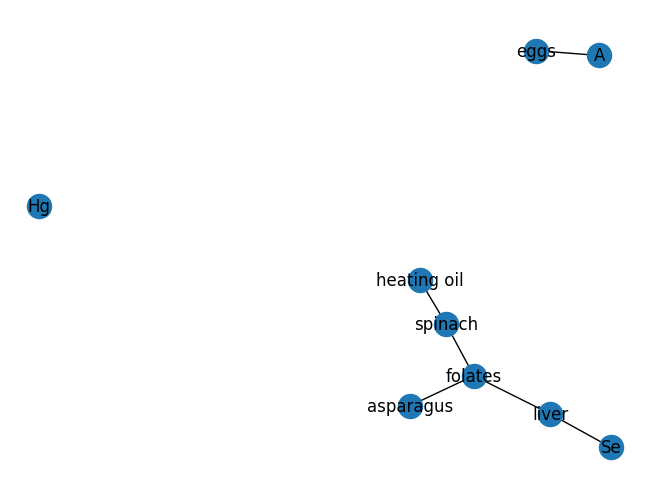

In [6]:
nx.draw(G, with_labels=True)

We intentionally added several inedible nodes—just to illustrate how one can
remove unwanted fragments:

In [7]:
G.remove_node("Hg")
G.remove_nodes_from(["Hg"]) # Safe to remove a missing node using a list
G.remove_edge("spinach", "heating oil")
G.remove_edges_from([("spinach", "heating oil")]) # See above
G.remove_node("heating oil") # Not removed yet

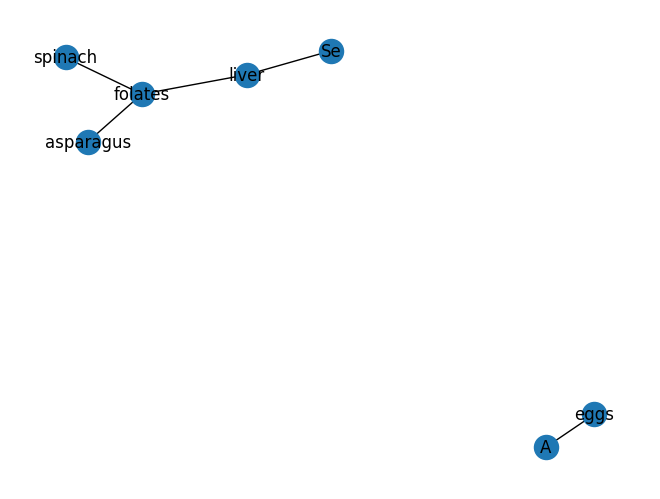

In [8]:
nx.draw(G, with_labels=True)

You can use the method **G.clear()** to delete all graph nodes and edges at once
but keep the graph shell.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

1. Add to graph G the following nodes: "tapioca", "açaí", "cashew", "sun-dried meat", "couscous".
2. Add to graph G the following edges: "tapioca" and "starch", "açaí" and "A", "açaí" and "E", "açaí" and "D", "cashew" and "C", "sun-dried meat" and "Na", "couscous" and "Mg". 

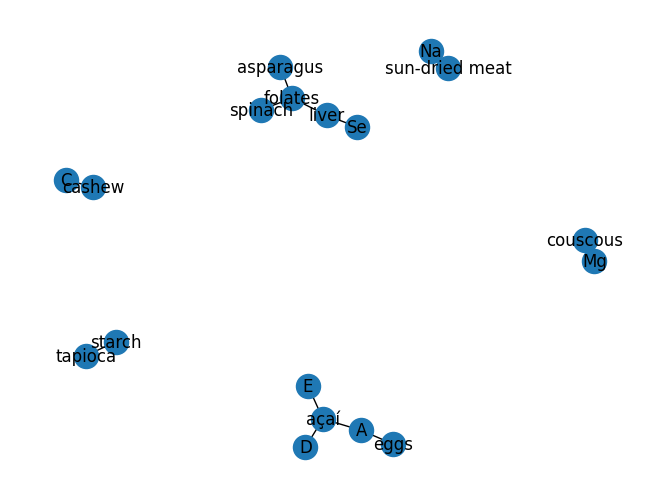

In [9]:
# put your code here
G.add_nodes_from(["tapioca", "açaí", "cashew", "sun-dried meat", "couscous"])
G.add_edges_from([
  ("tapioca", "starch"), 
  ("açaí", "A"), 
  ("açaí", "E"), 
  ("açaí", "D"), 
  ("cashew", "C"), 
  ("sun-dried meat", "Na"), 
  ("couscous", "Mg")
])

nx.draw(G, with_labels=True)

### 2.2.3 Look at Edge and Node Lists

NetworkX provides several options for exploring the node and edge lists. Graph
object attributes **G.node** and **G.edge** store all nodes and edges, respectively, in the
form of dictionaries. Node labels are the keys of G.node. Node attributes, in the
form of nested dictionaries, are the values. Since we did not assign any
attributes to the nodes yet, the dictionaries are empty.

In [10]:
G.nodes

NodeView(('A', 'eggs', 'spinach', 'folates', 'asparagus', 'liver', 'Se', 'tapioca', 'açaí', 'cashew', 'sun-dried meat', 'couscous', 'starch', 'E', 'D', 'C', 'Na', 'Mg'))

In [11]:
print(G.nodes)

['A', 'eggs', 'spinach', 'folates', 'asparagus', 'liver', 'Se', 'tapioca', 'açaí', 'cashew', 'sun-dried meat', 'couscous', 'starch', 'E', 'D', 'C', 'Na', 'Mg']


In [12]:
G.nodes["A"]

{}

In [13]:
G.edges

EdgeView([('A', 'eggs'), ('A', 'açaí'), ('spinach', 'folates'), ('folates', 'liver'), ('folates', 'asparagus'), ('liver', 'Se'), ('tapioca', 'starch'), ('açaí', 'E'), ('açaí', 'D'), ('cashew', 'C'), ('sun-dried meat', 'Na'), ('couscous', 'Mg')])

In [14]:
print(G.edges)

[('A', 'eggs'), ('A', 'açaí'), ('spinach', 'folates'), ('folates', 'liver'), ('folates', 'asparagus'), ('liver', 'Se'), ('tapioca', 'starch'), ('açaí', 'E'), ('açaí', 'D'), ('cashew', 'C'), ('sun-dried meat', 'Na'), ('couscous', 'Mg')]


In [15]:
G.edges["A","eggs"]

{}

If called with the optional parameter **data=True**, the methods return the lists
with the additional attribute dictionaries.

In [16]:
G.nodes(data=True)

NodeDataView({'A': {}, 'eggs': {}, 'spinach': {}, 'folates': {}, 'asparagus': {}, 'liver': {}, 'Se': {}, 'tapioca': {}, 'açaí': {}, 'cashew': {}, 'sun-dried meat': {}, 'couscous': {}, 'starch': {}, 'E': {}, 'D': {}, 'C': {}, 'Na': {}, 'Mg': {}})

In [17]:
G.edges(data=True)

EdgeDataView([('A', 'eggs', {}), ('A', 'açaí', {}), ('spinach', 'folates', {}), ('folates', 'liver', {}), ('folates', 'asparagus', {}), ('liver', 'Se', {}), ('tapioca', 'starch', {}), ('açaí', 'E', {}), ('açaí', 'D', {}), ('cashew', 'C', {}), ('sun-dried meat', 'Na', {}), ('couscous', 'Mg', {})])

In [18]:
# see the number of neighbors 
G["folates"]

AtlasView({'spinach': {}, 'liver': {}, 'asparagus': {}})

You can measure the length of the returned lists or dictionaries to find out
the number of nodes and edges. Additionally, function len(G) returns the
number of nodes in G.

In [19]:
len(G)

18

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

1. Iterate over the graph G and find the node with the largest number of neighbors
  - Store the number of neighbor to a dictionary using the follow template **key**: **value**. In this case, **key** is equal to **node** and **value** equal to **number of neighbors**. tip: use a dictonary comprehension. 
  - To find the dictionary key that has the greatest dictionary value, you can use this [technique](https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary#280156)

In [20]:
# put your code here

degrees         = dict(G.degree(G.nodes))
max_degree_node = max(degrees, key=degrees.get)

print(max_degree_node)

folates


### 2.2.4 Read a Network from a CSV File

Ideally, you would record a network in a file (using some popular data format,
such as comma-separated values, or CSV). You would then write a program
that reads the network data from the file and constructs a Graph object. NetworkX
has an excellent collection of file readers and writers, but let’s pretend it does
not and implement a CSV edge list reader. Our nutrients and foods are in the
file **nutrients.csv**.

Now, watch the magic of Python. It takes only three lines of code to open the
edge list file, create a CSV reader for the file, and “suck” the list of pairs into
the Graph constructor.

In [21]:
# download the dataset
!gdown https://drive.google.com/uc?id=17UpavC17C68CCCBC8bykPOGkgoyUyErY

Downloading...
From: https://drive.google.com/uc?id=17UpavC17C68CCCBC8bykPOGkgoyUyErY
To: /home/matheus/Desktop/UFRN/MATERIAS/ENG COMP/2 - SEMESTRE/AED 2/algorithms_and_data_structure/week_9/nutrients.csv
100%|██████████████████████████████████████████| 955/955 [00:00<00:00, 7.59MB/s]


In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import csv

csv_reader = csv.reader(open("nutrients.csv"))
G = nx.Graph(csv_reader)

print(G.nodes())

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']


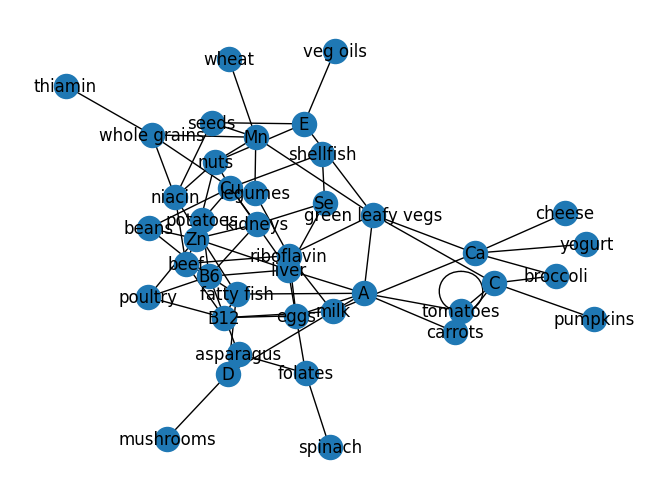

In [23]:
nx.draw(G, with_labels=True)

The provided edge list in the file **nutrients.csv** has an intentional inconsistency:
an edge that connects the node “tomatoes” with itself, a self-loop. You can
remove the self-loops by first identifying them with [nx.selfloop_edges(G)](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html) and then
passing the loop edges to [G.remove_edges_from()](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.DiGraph.remove_edges_from.html?highlight=remove_edges_from#networkx.DiGraph.remove_edges_from):

In [24]:
loops = list(nx.selfloop_edges(G))

loops

[('tomatoes', 'tomatoes')]

In [25]:
G.remove_edges_from(loops)

list(nx.selfloop_edges(G)) # No more loops

[]

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

1. Repeat the last exercice and find out the node in graph G with the largest number of neighbors.

In [26]:
# put your code here
degrees         = dict(G.degree(G.nodes))
max_degree_node = max(degrees, key=degrees.get)

print(max_degree_node)

B6


2. What is the average number of neigbors in graph G?

In [27]:
degrees = dict(G.degree())

degree_mean = sum(degrees.values()) / len(degrees)

print(degree_mean)

3.6097560975609757


### 2.2.5 Relabel Nodes



The network looks magnificent, but there is one more thing we can do to make
it better: **capitalize all node names**. NetworkX provides method [nx.relabel_nodes()](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.relabel.relabel_nodes.html)
that takes a graph and a dictionary of old and new labels and either creates
a relabeled copy of the graph (copy=True, default) or modifies the graph in place
(use the latter option if the graph is large and you don’t plan to keep the
original graph). Each dictionary key must be an existing node label, but some
labels may be missing. The respective nodes will not be relabeled.

We will use dictionary comprehension to walk through all network nodes and
convert those labeled with strings to the title case (capitalize the first letter
of each word).

In [28]:
mapping = {node: node.title() for node in G if isinstance(node, str)}

nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Yogurt', 'Veg Oils', 'Thiamin', 'Shellfish', 'Poultry', 'Spinach', 'Folates', 'Niacin', 'Riboflavin', 'Beef', 'Wheat', 'Legumes', 'Seeds', 'Mushrooms', 'Whole Grains', 'Nuts', 'Cheese', 'Broccoli', 'Pumpkins', 'Potatoes', 'Kidneys', 'Beans', 'Asparagus', 'Tomatoes', 'Milk', 'Liver', 'Green Leafy Vegs', 'Fatty Fish', 'Eggs', 'Carrots']


Note that G in the previous code fragment acts as a node iterator. In fact, G
has some other dict() features. For example, you can use selection operator []
to access the **edges incident to the node**, and their attributes:

In [29]:
G["Zn"]

AtlasView({'Poultry': {}, 'Beef': {}, 'Nuts': {}, 'Potatoes': {}, 'Kidneys': {}, 'Beans': {}, 'Liver': {}})

But wait, the network does not have any attributes yet. You may want to add them now.

## 2.3 Add Attributes


A **node** or **edge attribute** describes its **non-structural properties**. For example:

- **Edge attributes** may represent weight, strength, or throughput. 
- **Node attributes** may represent edge, color, size, or gender. 

NetworkX provides mechanisms for setting, changing, and comparing attributes.
An attribute is implemented as a dictionary associated with the node or edge.
The dictionary keys are attribute names. As such, they must be immutable:
int(), float(), bool(), str(), and so on. There are no limitations on the values. You
can create a node whose attribute is the node itself, except that this exercise
is utterly pointless. NetworkX offers three options for setting node and edge attributes.

- Define attributes at the time of adding nodes or edges:

In [30]:
G.add_node("Honey", edible=True)
G.add_nodes_from([("Steel", {"edible" : False})])

G.add_edge("Honey", "Steel", weight=0.0)
G.add_edges_from([("Honey", "Zn")], related=False)

In [31]:
G.nodes["Honey"]

{'edible': True}

In [32]:
G.nodes["Steel"]

{'edible': False}

In [33]:
G.edges["Honey","Steel"]

{'weight': 0.0}

In [34]:
G.edges["Honey","Zn"]

{'related': False}

NetworkX and other CNA libraries consistently use edge attribute **"weight"** to
denote edge strength. A graph whose edges have this attribute is called a **weighted graph**.
There is a method [G.add_weighted_edges_from()](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.DiGraph.add_weighted_edges_from.html) for adding weighted edges.

In [35]:
G.add_weighted_edges_from([("Honey", "Zn", 0.01), ("Honey", "Sugar", 0.99)])

In [36]:
G.edges["Honey","Zn"]

{'related': False, 'weight': 0.01}

In [37]:
G.edges["Honey","Sugar"]

{'weight': 0.99}

- Define or change an attribute of individual existing nodes and edges
directly through the dictionary interfaces G.node (indexed by node labels)
and G.edge (double indexed by start and end node labels):

In [38]:
G.nodes["Zn"]["nutrient"] = True # Zinc is a nutrient

In [39]:
G.nodes["Zn"]

{'nutrient': True}

In [40]:
G.edges["Zn","Beef"]["weight"] = 0.95 # Zinc and beef are well connected

In [41]:
G.edges["Zn","Beef"]

{'weight': 0.95}

The dictionary interface allows you to remove unwanted attributes:

In [42]:
del G.nodes["Zn"]["nutrient"]

G.nodes["Zn"]

{}

In [43]:
del G.edges["Zn","Beef"]["weight"]

G.edges["Zn","Beef"]

{}

- Define or change an attribute of existing nodes and edges by calling
[nx.set_node_attributes()](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html) or [nx.set_edge_attributes()](https://networkx.github.io/documentation/latest/reference/generated/networkx.classes.function.set_edge_attributes.html):


```python
nx.set_node_attributes(G, node_dict,att_name)
nx.set_edge_attributes(G, edge_dict, att_name)
```

Here, **att_name** is the name of the affected attribute, **node_dict/edge_dict** is a dictionary
whose keys are existing node labels or edge pairs, and values are
attribute values for the respective nodes/edges. If the attribute doesn’t exist
yet, it’s created; otherwise, the value of the existing attribute is changed. If
a key isn’t a node label or edge pair, the methods raise a **KeyError exception**.

In [44]:
nutrients = set(("B12", "Zn", "D", "B6",
                 "A", "Se", "Cu", "Folates",
                 "Ca", "Mn", "Thiamin", "Riboflavin",
                 "C", "E", "Niacin", "Mg", "Starch","Na"))

nutrient_dict = {node: (node in nutrients) for node in G}
nx.set_node_attributes(G, nutrient_dict, "nutrient")

In [45]:
G.nodes(data=True)

NodeDataView({'A': {'nutrient': True}, 'B12': {'nutrient': True}, 'B6': {'nutrient': True}, 'C': {'nutrient': True}, 'Ca': {'nutrient': True}, 'Cu': {'nutrient': True}, 'D': {'nutrient': True}, 'E': {'nutrient': True}, 'Mn': {'nutrient': True}, 'Se': {'nutrient': True}, 'Zn': {'nutrient': True}, 'Yogurt': {'nutrient': False}, 'Veg Oils': {'nutrient': False}, 'Thiamin': {'nutrient': True}, 'Shellfish': {'nutrient': False}, 'Poultry': {'nutrient': False}, 'Spinach': {'nutrient': False}, 'Folates': {'nutrient': True}, 'Niacin': {'nutrient': True}, 'Riboflavin': {'nutrient': True}, 'Beef': {'nutrient': False}, 'Wheat': {'nutrient': False}, 'Legumes': {'nutrient': False}, 'Seeds': {'nutrient': False}, 'Mushrooms': {'nutrient': False}, 'Whole Grains': {'nutrient': False}, 'Nuts': {'nutrient': False}, 'Cheese': {'nutrient': False}, 'Broccoli': {'nutrient': False}, 'Pumpkins': {'nutrient': False}, 'Potatoes': {'nutrient': False}, 'Kidneys': {'nutrient': False}, 'Beans': {'nutrient': False}, 'A

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

1. Use the nx.set_node_attributes() to create two new attributes for all nodes: 
  - neigh_size: the number of neighbor
  - id_node: identification number of node (starts with the value zero)

In [59]:
len(G)

44

In [94]:
# put your code here
ids         = {node: id for id, node in enumerate(G.nodes)}
neigh_sizes = {node: G.degree(node) for node in G}

nx.set_node_attributes(G,         ids,         "id")
nx.set_node_attributes(G, neigh_sizes, "neigh_size")

## 2.4 Visualize a Network with Matplotlib

NetworkX is not aesthetically the best library for network
visualization. In fact, it does not even do visualization on its
own but uses [services rendered by Matplotlib](https://networkx.github.io/documentation/latest/reference/drawing.html), a multipurpose
graphics library. Luckily, the team of NetworkX and Matplotlib
is fast and easy to understand, and the interaction with Matplotlib is well hidden
from the network analyst; you do not need to learn yet another library—but
still, you need to import it.

In [70]:
import matplotlib.pyplot as plt

The process of network visualization consists of two phases: **layout** and **rendering**.

At the layout phase, the software selects geometric positions of each node according to a layout algorithm.
NetworkX supports a variety of layout algorithms. You can choose one of them, based on your aesthetic preferences and your network’s aesthetic propensity.

For each algorithm, NetworkX has a proper layout function that takes the graph
to plot and returns a dictionary of node positions (to be used at the rendering
phase), and an all-in-one function that does both layout and rendering. 

In [71]:
# Prepare for drawing
colors = ["blue" if n[1]["nutrient"] else "red" for n in G.nodes(data=True)]

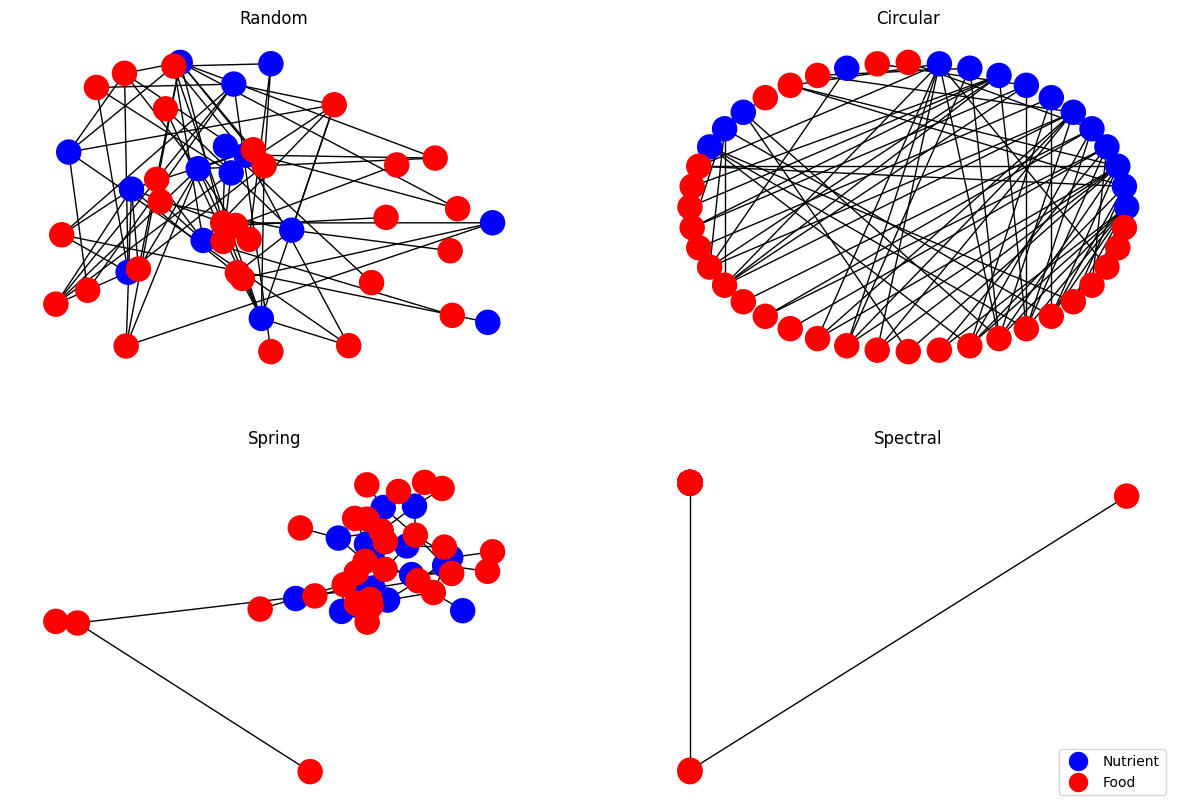

In [72]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, plot = plt.subplots(2, 2,figsize=(15,10))
subplots = plot.reshape(1, 4)[0]

layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout,nx.spectral_layout)
titles = ("Random", "Circular", "Spring", "Spectral")

for plot, layout, title in zip(subplots, layouts, titles):
  pos = layout(G)
  nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False,node_color=colors)
  plot.set_title(title)
  plot.axis("off")
  # advanced manual configuration for legend
  legend_elements = [
      Line2D([0], [0], marker='o', color='w', 
             label='Nutrient',markerfacecolor='b', markersize=15),
      Line2D([0], [0], marker='o', color='w', 
             label='Food',markerfacecolor='r', markersize=15)
  ]
  if title == "Spectral":
    plot.legend(handles=legend_elements, loc='lower right')
  

plt.show()

For most complex networks, the spring layout (the default layout for
**nx.draw_networkx()**) produces the most pleasing output.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

1. Create a visualization of graph G using matplotlib with the following features:
  - spring layout
  - the node size must be proportional to number of neighbors (tip: change the node_size parameter in the nx.draw_networkx() function).

In [98]:
# put your code here

## 2.5 Visualize a Network with nxviz

[nxviz](https://github.com/ericmjl/nxviz) is a graph visualization package in a rational fashion for NetworkX. With nxviz, you can create beautiful graph visualizations by a declarative API.

In [99]:
import nxviz as nv

/home/matheus/Desktop/UFRN/MATERIAS/ENG COMP/2 - SEMESTRE/AED 2/algorithms_and_data_structure/venv/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


### 2.5.1 Visualizing using Matrix plots

This code is a Python script that visualizes a graph G using the **nxviz** library, which is built on top of matplotlib. The visualization method used is the matrix plot, and it sorts and groups the nodes by a ``nutrient`` attribute. Additionally, it highlights specific nodes, rows, and edges of the matrix.

NameError: name 'choice' is not defined

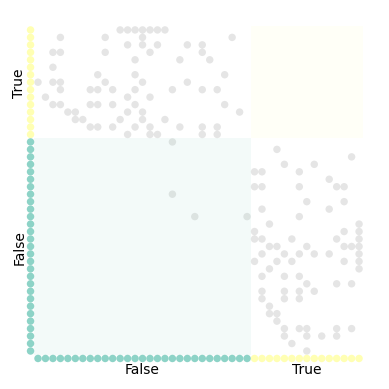

In [100]:
# Import the required libraries
# Import matplotlib
import matplotlib.pyplot as plt
from nxviz import annotate, highlights

# Import nxviz
import nxviz as nv

# Create a matrix plot of the graph G, sorting 
# and coloring the nodes by the "nutrient" attribute
ax = nv.matrix(G, sort_by="nutrient", node_color_by="nutrient")

# Annotate the matrix by drawing lines separating the groups 
# and blocks defined by the "nutrient" attribute:
annotate.matrix_group(G, group_by="nutrient")
annotate.matrix_block(G, group_by="nutrient", color_by="nutrient", alpha=0.1)

# Randomly select an edge from the graph G
u, v = choice(list(G.edges()))

# Highlight the nodes u and v in the matrix plot, with v highlighted in blue
highlights.matrix_node(G, u, group_by="nutrient", sort_by="nutrient")
highlights.matrix_node(G, v, group_by="nutrient", sort_by="nutrient", color="blue")

# Highlight the rows corresponding to nodes u and v 
# in the matrix plot, with the row for v highlighted in blue:
highlights.matrix_row(G, u, group_by="nutrient", sort_by="nutrient")
highlights.matrix_row(G, v, group_by="nutrient", sort_by="nutrient", axis="y", color="blue")

# Highlight the edge between nodes u and v in the matrix plot
highlights.matrix_edge(G, u, v, group_by="nutrient", sort_by="nutrient")

In [ ]:
from nxviz.utils import edge_table, node_table
edge_table(G)

,source,target,related,weight
0,A,Tomatoes,NaN,NaN
1,Tomatoes,A,NaN,NaN
2,A,Milk,NaN,NaN
3,Milk,A,NaN,NaN
4,A,Liver,NaN,NaN
...,...,...,...,...
149,Eggs,Riboflavin,NaN,NaN
150,Honey,Steel,NaN,0.00
151,Steel,Honey,NaN,0.00
152,Honey,Sugar,NaN,0.99


In [ ]:
node_table(G)

,nutrient,edible
A,True,NaN
B12,True,NaN
B6,True,NaN
C,True,NaN
Ca,True,NaN
Cu,True,NaN
D,True,NaN
E,True,NaN
Mn,True,NaN
Se,True,NaN


In [ ]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

# Convert G to a matrix format: A
A = nx.to_numpy_array(G)

# note some edges have weights different of 1
print(A)

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   1.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.   1.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   1.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   1.   1.   1.   1.   0.   0.   1.   0.   1.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.   1.   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   1.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0

### 2.5.2 Visualizing using Circos plots



**Circos plots** are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

This visualization helps us **highlight nodes that there are poorly connected**, and others that are **strongly connected**.


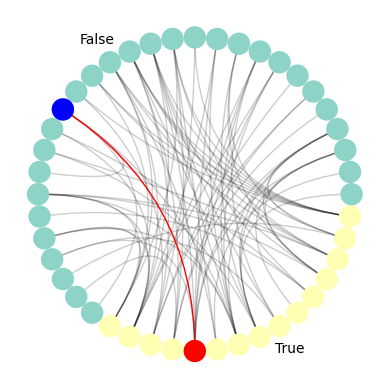

In [ ]:
ax = nv.circos(G, 
               group_by="nutrient",
               node_color_by="nutrient",
               #edge_alpha_by="edge_value"
)
annotate.circos_group(G, group_by="nutrient")

# # Randomly select an edge from the graph G
u, v = choice(list(G.edges()))

highlights.circos_edge(G, u, v, group_by="nutrient")
highlights.circos_node(G, u, group_by="nutrient")
highlights.circos_node(G, v, group_by="nutrient", color="blue")

### 2.5.3 Visualizing using Arc plots



Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. 

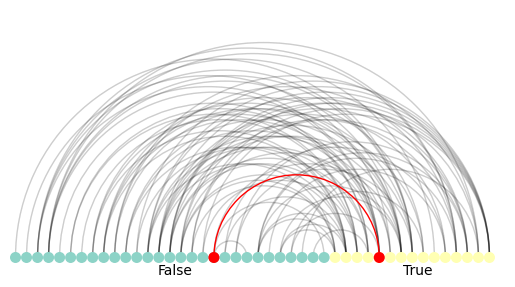

In [ ]:
ax = nv.arc(
    G, group_by="nutrient", node_color_by="nutrient"#, edge_alpha_by="edge_value"
)

annotate.arc_group(G, group_by="nutrient", ha="center", rotation=0)
highlights.arc_node(G, u, group_by="nutrient")
highlights.arc_node(G, v, group_by="nutrient")
highlights.arc_edge(G, source=u, target=v, group_by="nutrient")

### 2.5.4 Visualizing using Hive Plots

Hive plots are designed to show two or three groups of nodes and their connections. They aren't designed to do more than three groups because of geometric constraints. That said, we can work around this constraint by extracting triplet subgroups of nodes, thus building a hive panel.

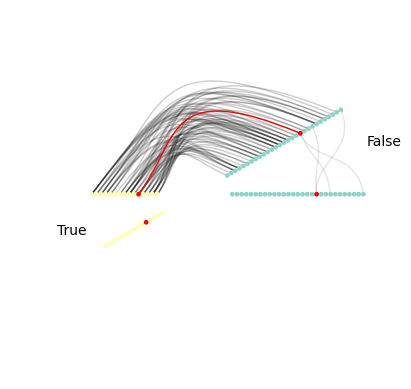

In [ ]:
ax = nv.hive(G, group_by="nutrient", node_color_by="nutrient")
annotate.hive_group(G, group_by="nutrient")
highlights.hive_node(G, u, group_by="nutrient")
highlights.hive_node(G, v, group_by="nutrient")
highlights.hive_edge(G, u, v, group_by="nutrient")

## 2.6 Share and Preserve Networks

### 2.6.1 Export and import networks

At this point, you must be very proud of the job well done. The network of
foods and nutrients has been extracted, constructed, and visualized. **It’s time
to save it into a file**, and there are several compelling reasons for doing so:

- You may want to get a better network visualization of the network with
[Gephi](https://gephi.org/). The only way for NetworkX to pass the network to Gephi is via a file. <font color="red">By the way, we will see Gephi later in this course. Dont worry for now.</font>
- Sharing the network with the fellow researchers is priceless, but they
want a file with the live network edges and nodes, not a still image.

NetworkX supports many popular file formats suitable for interchanging network
data with other software.

Any NetworkX network can be exported to or imported from files (serialized and
de-serialized) in the formats shown in the following table. All nx.read___() functions
take the name of an existing file or an open file handle and return a
Graph object. All nx.write___() functions take a Graph object and the name of an
existing file or an open file handle. Files with names ending in .gz or .bz2 are
automatically compressed or uncompressed. Some functions require that the
files be opened in the binary mode.


| Format                    | Attributes | Reader             | Writer              | Supported by Gephi? |
|---------------------------|------------|--------------------|---------------------|---------------------|
| Adjacency list            | Not stored | nx.read_adjlist()  | nx.write_adjlist()  | Yes                 |
| Edge list                 | Not stored | nx.read_edgelist() | nx_write_edgelist() | Yes                 |
| Graph exchange XML format | Stored     | nx.read_gexf()     | nx.write_gexf()     | Yes                 |
| Graph modeling language   | Stored     | nx.read_gml()      | nx.write_gml()      | w/o attributes      |
| GraphML                   | Stored     | nx.read_graphml()  | nx.write_graphml()  | Yes                 |
| Pajek NET                 | Not stored | nx.read_pajek()    | nx.write_pajek()    | Yes                 |
| Pickle                    | Stored     | nx.read_gpickle()  | nx.write_gpickle()  | No                  |
| YAML                      | Stored     | nx.read_yaml()     | nx.write_yaml()     | No                  |

As an example, let’s export the G network as a GraphML file. 
GraphML is one of the best interchange format between NetworkX and Gephi.

In [ ]:
nx.write_graphml(G, "nutrients.graphml")